# Predicting Red Wine Quality Using Machine Learning

This notebook looks into using various Python-based machine learning and data science libraries in an attempt to build a machine learning model capable of predicting whether a wine can be classified as bad or good based on physicochemical wine properties.

We will take the following approach
1. Problem Definition
2. Data 
3. Evaluation
4. Features
5. Modelling

## 1. Problem Definition

In a statement, 

> Given physicochemical inputs about a wine, can we predict what kind of output the wine will produce to our senses when tasted.

## 2. Data

The original data is from the UCI machine learning repository, https://archive.ics.uci.edu/ml/datasets/wine+quality 

It is also available on Kaggle, https://www.kaggle.com/uciml/red-wine-quality-cortez-et-al-2009

## 3. Evaluation 

> If we can reach 82% accuracy on wine classifications then we should pursue building this model into an application

## 4. Features

This is where you will get information about each of the features of the data 

Input variables (based on physicochemical tests):
*  fixed acidity
*  volatile acidity
*  citric acid
*  residual sugar
*  chlorides
*  free sulfur dioxide
*  total sulfur dioxide
*  density
*  pH
*  sulphates
*  alcohol

Output variable (based on sensory data):

*  quality (score between 0 and 10)

## 5. Modelling 

We will use to main classification algorithms against our data set

* Random Forest Classifier
* K-Nearest Neighbors Classifier


## Prepare the Tools
we're going to use pandas, Matplotlib, and NumPy for the data analysis and manipulation

In [1]:
# import all the tools we need

# Regular EDA (exploratory data analysis) and planning libraries
import sys
sys.path.append('/Users/nick/.virtualenvs/red_wine_project/lib/python3.7/site-packages') # needed to append a path since the env was getting confused COMMENT OUT OR CHANGE PATH AS NEEDED
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# %matplotlib inline # we want our plots to appear inside the notebook

# Models from scikit-learn
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier

# Model Evaluation 
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import plot_roc_curve
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn import datasets, linear_model, metrics

## Load Data

In [2]:
df = pd.read_csv("data/winequality-red.csv")
df.shape # (rows, columns)

(1599, 12)

## Data Exploration (EDA)

The goal here is to learn more about the data and become a subject matter expert on the data set

1. What question(s) are you trying to solve?
2. What kind of data do we have and how do we treat different types?
3. What's missing from the data and how do you deal with it?
4. Where are the outliers and why should you care about them?
5. How can you add, change or remove features to get more out of your data?

In [3]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [4]:
df.tail()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,5
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,6
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,6
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,5
1598,6.0,0.310,0.47,3.6,0.067,18.0,42.0,0.99549,3.39,0.66,11.0,6


In [5]:
# Let's find out how many of each class there are
df["quality"].value_counts()

5    681
6    638
7    199
4     53
8     18
3     10
Name: quality, dtype: int64

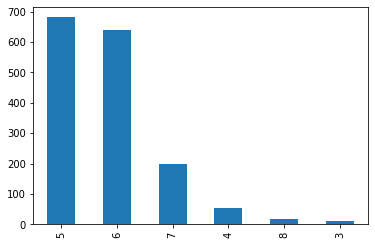

In [6]:
df["quality"].value_counts().plot(kind="bar");

In [7]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1599 non-null   float64
 1   volatile acidity      1599 non-null   float64
 2   citric acid           1599 non-null   float64
 3   residual sugar        1599 non-null   float64
 4   chlorides             1599 non-null   float64
 5   free sulfur dioxide   1599 non-null   float64
 6   total sulfur dioxide  1599 non-null   float64
 7   density               1599 non-null   float64
 8   pH                    1599 non-null   float64
 9   sulphates             1599 non-null   float64
 10  alcohol               1599 non-null   float64
 11  quality               1599 non-null   int64  
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [8]:
# Are there any missing values? 
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [9]:
# let's get an idea of the data
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


# More Data Analysis

### I want to see the average values for each column at each quality level 

In [10]:
X=df.iloc[:,0:-1] # get all the columns except the last one 
i=1
X
qualities = [3,4,5,6,7,8] # all the qualities that exist
averages_for_each_feature = {} # initialize an empty dictionary
for col in X.columns:
    averages_for_each_feature.setdefault(col, [])
    for quality in qualities:
        current_quality = df.quality==quality
        current_quality = df.loc[current_quality, col]
        current_quality_average = current_quality.std()
        averages_for_each_feature[col].append(current_quality_average)
averages_for_each_feature # output the dictionary for analysis




{'fixed acidity': [1.7708754896942924,
  1.6266244532024496,
  1.563988004435059,
  1.7978488461260116,
  1.9924833370021076,
  2.1196559099227845],
 'volatile acidity': [0.3312556079189872,
  0.2201100216381441,
  0.16480118525037726,
  0.16096226213753823,
  0.14522435992280733,
  0.14491376746189438],
 'citric acid': [0.250663563810583,
  0.20103036473918515,
  0.18000265011053854,
  0.19510842430501282,
  0.19443220682701143,
  0.1995255811076361],
 'residual sugar': [1.4015963121463406,
  1.7894364276475883,
  1.3597526302971052,
  1.4415757980876902,
  1.3715093941984875,
  1.295038294030928],
 'chlorides': [0.06624072262085713,
  0.07619175545568856,
  0.053707410252593867,
  0.03956329053383698,
  0.02945551439988787,
  0.011678145613380595],
 'free sulfur dioxide': [9.763879010584539,
  9.025926211573964,
  10.955446021481029,
  9.94091131089981,
  10.175255429455678,
  11.155613493587014],
 'total sulfur dioxide': [16.828877297999146,
  27.583374075684237,
  36.99311576405531

### I want to visualize the quality of wine compared to each input

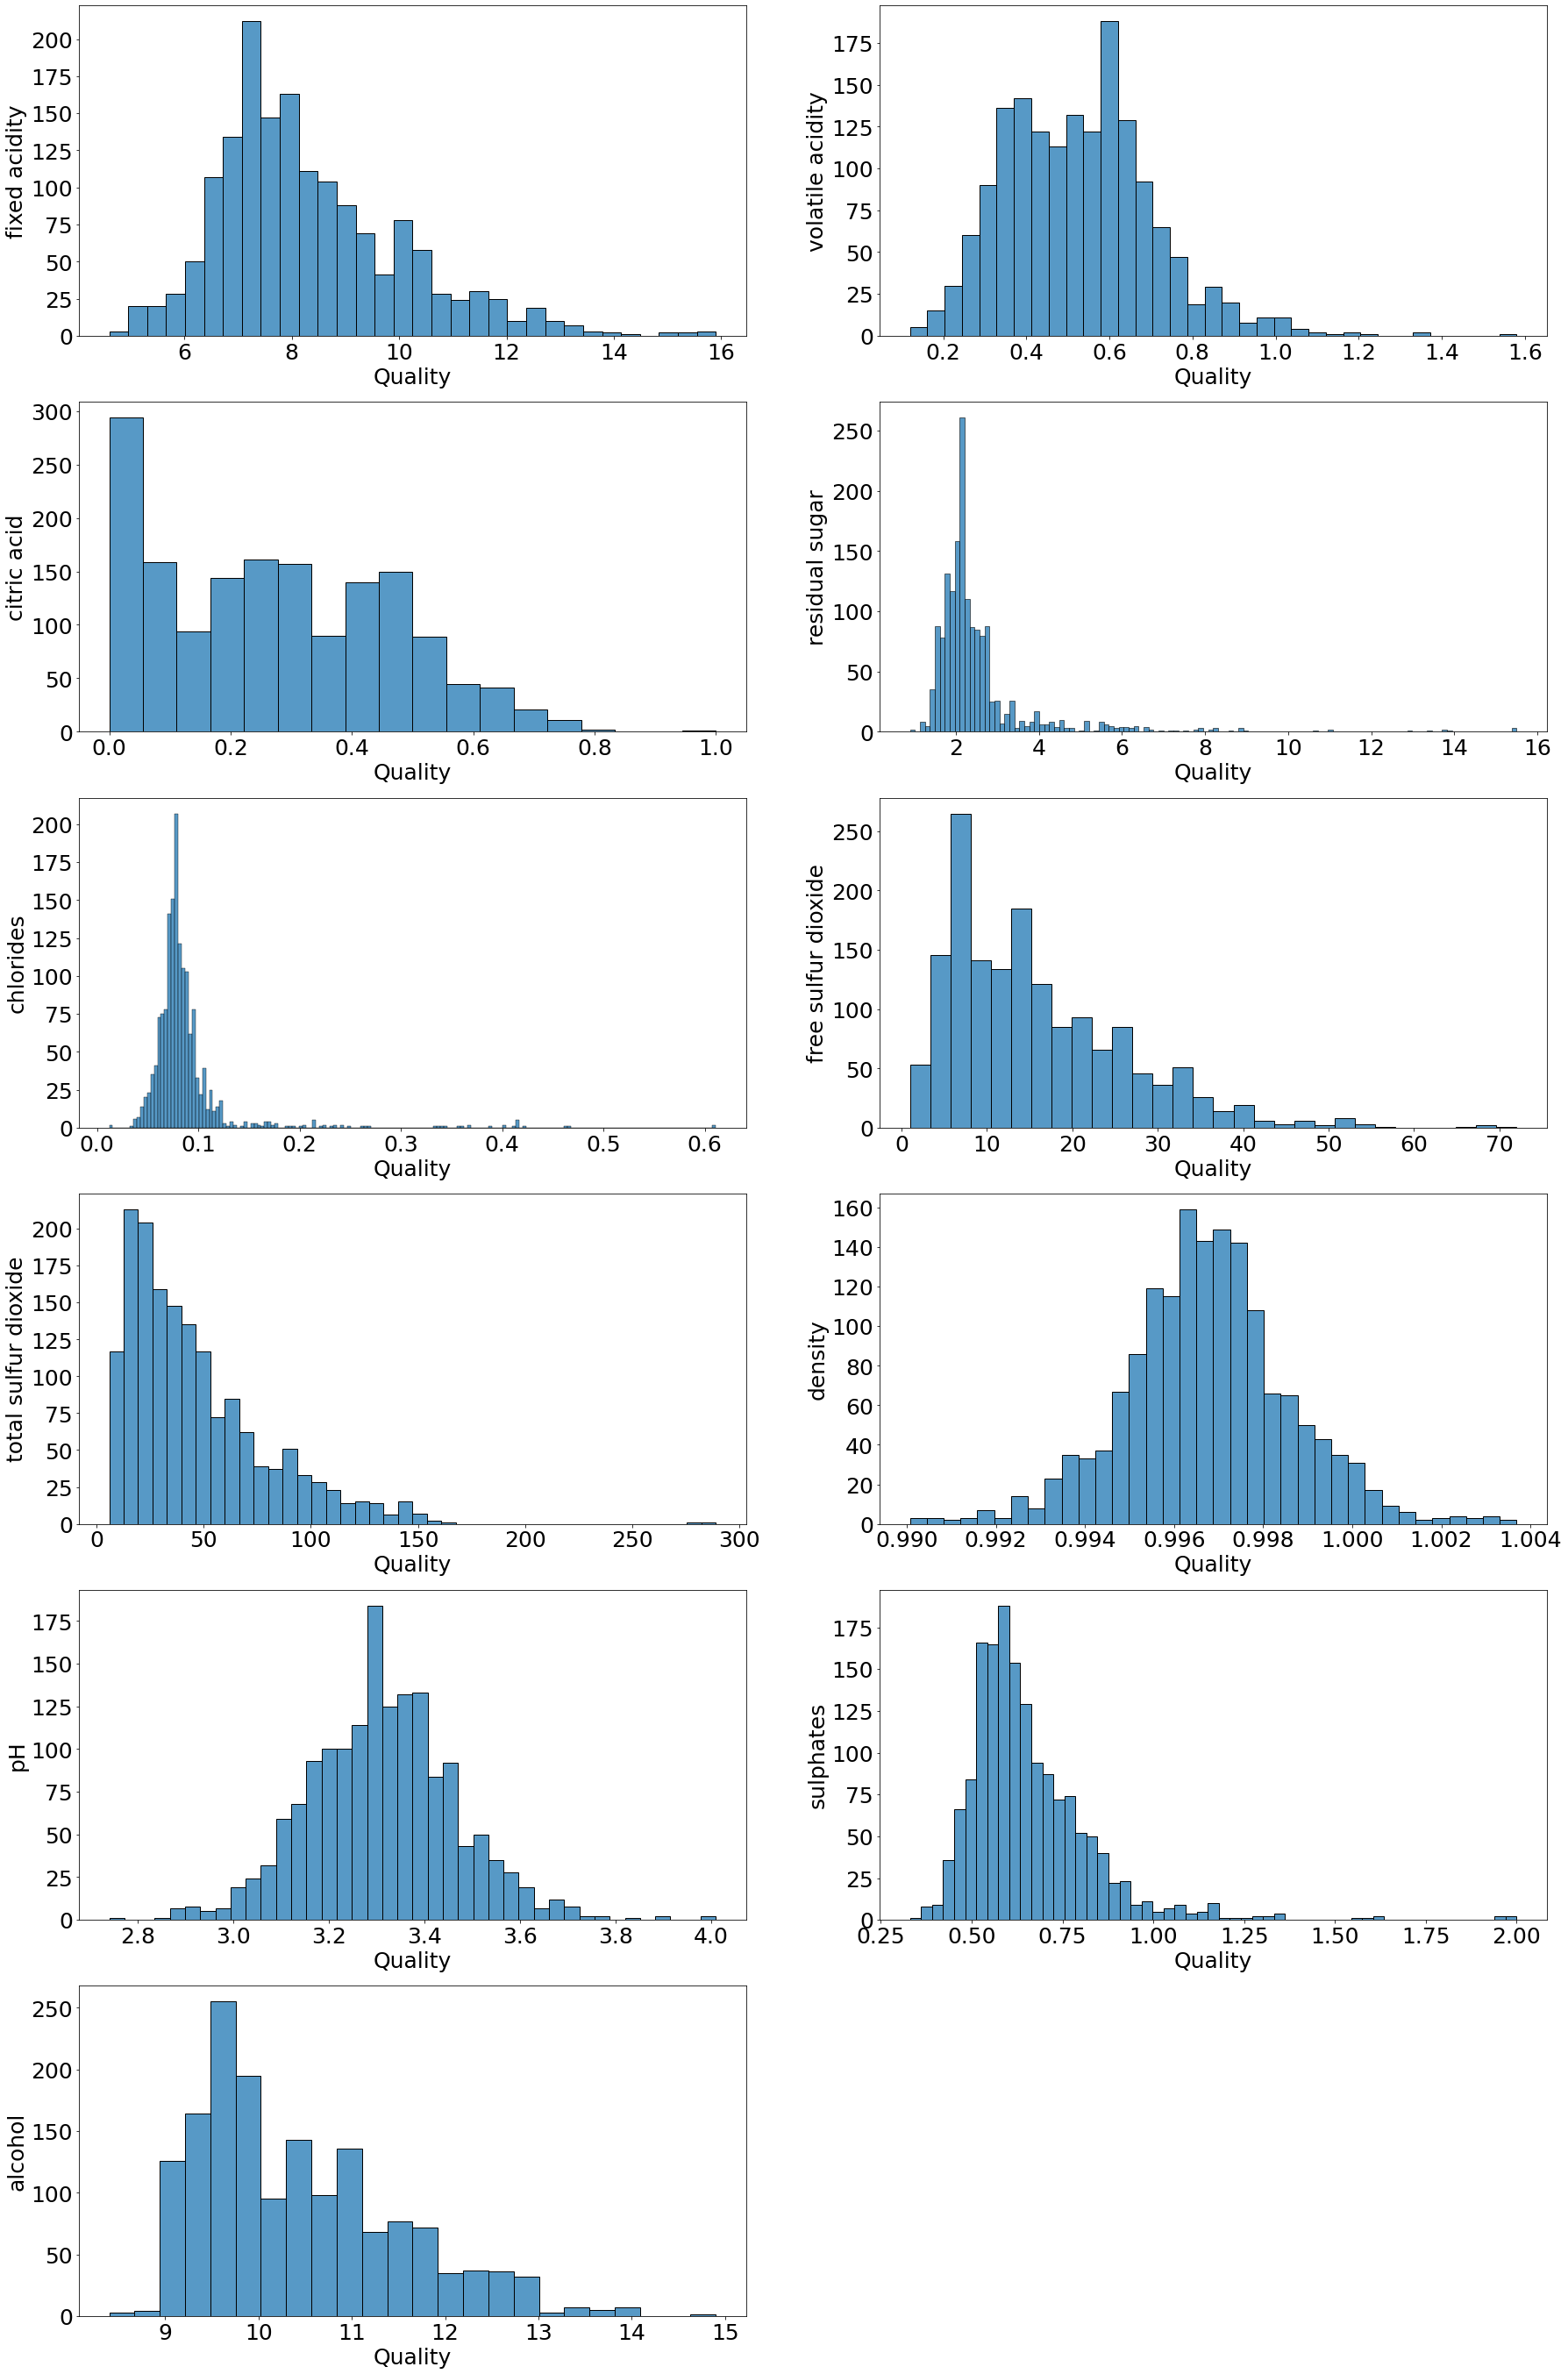

In [11]:
X=df.iloc[:,0:-1]
i=1
plt.figure(figsize=(30,90))
for col in X.columns:
    plt.subplot(11,2,i)
    sns.histplot(X[col], palette="crest")
    plt.xticks(fontsize=25)
    plt.yticks(fontsize=25)
    plt.xlabel("Quality", fontsize=25)
    plt.ylabel(col, fontsize=25)

    i=i+1
plt.show()

### For this plot we can interchange any column we want to see compared with average quality

below we have quality average vs. alcohol average

to change just switch alcohol with any other input such as 'fixed acidity'

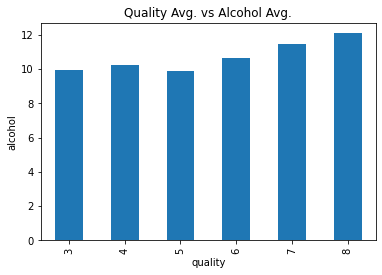

In [12]:
# below we use an average to derive this plot

# Take the average and plot in a bar graph due to the amount of different data points
df.groupby('quality')['alcohol'].mean().plot.bar()
plt.xlabel('quality')
plt.ylabel('alcohol')
plt.title('Quality Avg. vs Alcohol Avg.')
plt.show()

# Data Preparation

let's start to get our data ready for modelling. This will involve a few things:

1. We will need to assign classifications for 'bad' and 'good'
2. Splitting the data into inputs and outputs
3. Split the data again into training and testing sets

In [13]:
# here we are splitting the quality values into good or bad based on a choosen threshold
# NOTE: this code can only be run once since we change the output column values

bins = (2.0, 6.0, 8.0) # our cutoff values
group_names = ['bad','good'] # our classifications
df['quality'] = pd.cut(df['quality'], bins=bins, labels=group_names) # put the data into bins
df.head() # show that the last column has changed

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,bad
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,bad
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,bad
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,bad


In [14]:
# let's find examples of bad wines
df.loc[df.quality == 'bad']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,bad
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,bad
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,bad
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,bad
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,bad
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,bad
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,bad
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,bad


In [15]:
# now let's get only good values
df.loc[df.quality == 'good']

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,good
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,good
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,good
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,good
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,good
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,good
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,good
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,good
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,good


In [16]:
# Now lets assign some labels to our quality variable, we need to switch it 0 and 1
label_quality = LabelEncoder()

In [17]:
# Bad becomes 0 and good becomes 1 
df['quality'] = label_quality.fit_transform(df['quality'])
df['quality'].value_counts()

0    1382
1     217
Name: quality, dtype: int64

/Users/nick/.virtualenvs/red_wine_project/lib/python3.7/site-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


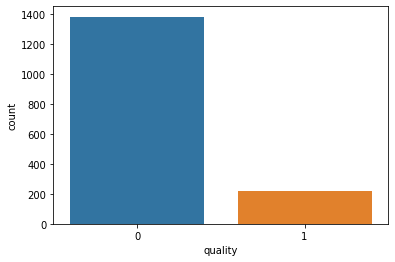

In [18]:
# simple plot showing how many bad and good wines we have
sns.countplot(df['quality'])
plt.show()

### Splitting the data into X and y | inputs and output

In [19]:
# split the data into X and y
X = df.drop("quality", axis=1)

y = df["quality"]

### Generate a random seed for reproducibility and split into test and train data

In [20]:
# set seed
np.random.seed(42)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [21]:
# let's run KNN to see how well it performs
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
score

/Users/nick/.virtualenvs/red_wine_project/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"
/Users/nick/.virtualenvs/red_wine_project/lib/python3.7/site-packages/sklearn/base.py:442: UserWarning: X does not have valid feature names, but KNeighborsClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8729166666666667

In [22]:
# now we try and run the RF 
forest= RandomForestClassifier(n_estimators=40, random_state=0)
forest.fit(X_train, y_train)
y_pred = forest.predict(X_test)
# let's see how well our random forest did, 
rf_score = forest.score(X_test, y_test)
rf_score

0.8854166666666666

# Our results so far

we got a **87.2%** for our knn model and **89.0%** for our random forest model

we got this without scaling the features down, which makes sense becuase the data doesn't vary that much


# Testing the Models on Passed Inputs

we want to test on something that should be a bad wine then something that should be a good wine
let's see what we get ... 

In [23]:
# let's find a wine that has a quality of == 0
df.loc[df.quality == 0]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
1,7.8,0.880,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,0
2,7.8,0.760,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,0
3,11.2,0.280,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,0
4,7.4,0.700,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,0
...,...,...,...,...,...,...,...,...,...,...,...,...
1594,6.2,0.600,0.08,2.0,0.090,32.0,44.0,0.99490,3.45,0.58,10.5,0
1595,5.9,0.550,0.10,2.2,0.062,39.0,51.0,0.99512,3.52,0.76,11.2,0
1596,6.3,0.510,0.13,2.3,0.076,29.0,40.0,0.99574,3.42,0.75,11.0,0
1597,5.9,0.645,0.12,2.0,0.075,32.0,44.0,0.99547,3.57,0.71,10.2,0


In [24]:
test_bad_wine = {
"fixed acidity": 7.4,
"volatile acidity": 0.700,
"citric acid": 0.00,
"residual sugar": 1.9,
"chlorides": 0.076,
"free sulfur dioxide": 11.0,
"total sulfur dioxide": 34.0,
"density": 0.99780,
"pH": 3.51,
"sulphates": 0.56,
"alcohol": 9.4
}

# need to turn the dict into a data frame
test_bad_wine_df = pd.DataFrame([test_bad_wine])

test_bad_wine_pred = forest.predict(test_bad_wine_df)
test_bad_wine_pred

array([0])

## Great! that wine was predicted to be bad like it should have

# Now let's test on wine that should be good!

In [25]:
# let's find a wine that has a quality of == 1
df.loc[df.quality == 1]

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
7,7.3,0.65,0.00,1.2,0.065,15.0,21.0,0.99460,3.39,0.47,10.00,1
8,7.8,0.58,0.02,2.0,0.073,9.0,18.0,0.99680,3.36,0.57,9.50,1
16,8.5,0.28,0.56,1.8,0.092,35.0,103.0,0.99690,3.30,0.75,10.50,1
37,8.1,0.38,0.28,2.1,0.066,13.0,30.0,0.99680,3.23,0.73,9.70,1
62,7.5,0.52,0.16,1.9,0.085,12.0,35.0,0.99680,3.38,0.62,9.50,1
...,...,...,...,...,...,...,...,...,...,...,...,...
1541,7.4,0.25,0.29,2.2,0.054,19.0,49.0,0.99666,3.40,0.76,10.90,1
1544,8.4,0.37,0.43,2.3,0.063,12.0,19.0,0.99550,3.17,0.81,11.20,1
1549,7.4,0.36,0.30,1.8,0.074,17.0,24.0,0.99419,3.24,0.70,11.40,1
1555,7.0,0.56,0.17,1.7,0.065,15.0,24.0,0.99514,3.44,0.68,10.55,1


In [26]:
test_good_wine = {
"fixed acidity": 6.7,
"volatile acidity": 0.32,
"citric acid": 0.44,
"residual sugar": 2.4,
"chlorides": 0.061,
"free sulfur dioxide": 24.0,
"total sulfur dioxide": 34.0,
"density": 0.99484,
"pH": 3.29,
"sulphates": 0.80,
"alcohol": 11.6
}

# need to turn the dict into a data frame
test_good_wine_df = pd.DataFrame([test_good_wine])

test_good_wine_pred = forest.predict(test_good_wine_df)
test_good_wine_pred

array([1])

## Produce an output of 1, so that is a 'good' wine!


# Let's now export our model using the Pickle library so we can use it in out API

In [27]:
import pickle

pick = {
    'rf': forest, 
    'knn': knn
}

pickle.dump(pick, open('models' + ".p", "wb"))

# Scaling for Experimentation

just to see if the model gets better with scaling

In [ ]:
# let's setup our scaler function
scaler = StandardScaler()

# then let's scale everything EXCEPT our last column
scaler.fit(df.drop('quality', axis=1)) # compute mean and std for later scaling

scaled_features = scaler.transform(df.drop('quality', axis=1)) # actually scale

# what does our data look now?
df_features_scaled = pd.DataFrame(scaled_features, columns=df.columns[:-1]) # create a new df with scaled features
df_features_scaled.head()

In [ ]:
df_features_scaled.describe()

In [ ]:
# let's now train the models on our scaled features

X = df_features_scaled
y = df.quality

In [ ]:
# set seed
np.random.seed(42)

# Split the data into training and test data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [ ]:
# let's run KNN to see how well it performs
knn = KNeighborsClassifier(n_neighbors=2)
knn.fit(X_train, y_train)
pred = knn.predict(X_test)
score = knn.score(X_test, y_test)
score


In [ ]:
# now we try and run the RF 
forest = RandomForestClassifier(n_estimators=40, random_state=0)
forest.fit(X_train, y_train)
rf_score = forest.score(X_test, y_test)
rf_score

### the above scaling didn't result in much better accuracy.. actually it got worse.